In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import sklearn
import sys
import os 

import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
def global_background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [3]:
print("Python", sys.version)
print("--------")
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("SKLearn:", sklearn.__version__)

Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
--------
Pandas: 1.2.4
Numpy: 1.20.1
SKLearn: 0.24.1


In [4]:
paises_escolhidos = {Paises: ['Bulgaria', 'United Arab Emirates', 'Liechtenstein', 'Singapore', 'Mexico', 'China',
                                'Indonesia', 'Turkey', 'Peru', 'United States', 'Czech Republic', 'Latvia', 'France',
                                'United Kingdom', 'Lithuania','Finland', 'Switzerland', 'Canada', 'Brazil','Uruguay',
                                'Slovak Republic', 'Hungary', 'Portugal', 'United States', 'Greece', 'Australia', 'South Korea',
                                'Russia', 'Japan', 'Taiwan', 'Hungary', 'Italy', 'Colombia',
                                'Chile', 'South Korea', 'Denmark', 'Sweden']}

In [5]:
pisa0 = pd.read_csv('data/data/pisa2012.csv')

In [6]:
pisa_dict = pd.read_csv('data/pisa2012_vardescs.csv')
with pd.option_context('display.max_rows', None):  
    display(pisa_dict)

,varname,desc
0,CNT,Country name
1,OECD,OECD country?
2,ST01Q01,International Grade
3,ST03Q01,Birth - Month
4,ST03Q02,Birth - Year
5,ST04Q01,Genre
6,ST07Q01,Repeat - ISCED1 (1o-5o ano Brasil)
7,ST07Q02,Repeat - ISCED2 (6o-9o ano Brasil)
8,ST08Q01,Truancy - Late for School
9,ST09Q01,Truancy - Skip whole school day


In [7]:
pisa_desc = dict(zip(list(pisa_dict['varname'].values), list(pisa_dict['desc'].values)))

# ex: qual o significado da variável ST28Q01
pisa_desc['ST28Q01']

'How many books at home'

In [8]:
pe = 'Paises'
countries = paises_escolhidos[Paises]

pisa = pisa0[pisa0.CNT.isin(countries)].copy()

In [9]:
#Utilizando a função info() para saber exatamente as dimensoes de colunas e os tipos de dados do meu dataframe
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314423 entries, 4743 to 480443
Columns: 105 entries, CNT to PV1SCIE
dtypes: float64(21), int64(6), object(78)
memory usage: 254.3+ MB


In [10]:
#Utilizando a função shape() para saber quantas linhas e colunas eu vou utilizar
pisa.shape

(314423, 105)

In [11]:
#O função describe() me descreve um conjunto de estatisticas descritivas
pisa.describe()

,ST01Q01,ST03Q01,ST03Q02,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST70Q01,...,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,PV1MATH,PV1READ,PV1SCIE
count,314423.000000,314423.000000,314423.000000,197103.000000,175947.000000,183057.000000,180454.000000,187719.000000,187996.000000,193065.000000,...,202228.000000,201905.000000,202193.00000,202034.000000,314423.000000,314423.000000,314423.000000,314423.000000,314423.000000,314423.000000
mean,9.854244,6.531618,1996.083967,5.572087,1.619260,0.849429,0.827374,1.171911,1.555714,4.398980,...,1.878340,2.870835,1.95254,1.922335,38.466334,39.469985,40.023211,473.456131,476.495323,478.950639
std,3.754059,3.416057,0.277338,5.572963,2.632198,2.135932,2.333936,2.350980,2.773171,1.758135,...,0.796272,0.986166,0.87840,0.839369,46.135271,45.224138,45.109533,104.153199,101.110418,100.868427
min,7.000000,1.000000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,59.674400,2.545700,70.440100
25%,9.000000,4.000000,1996.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,1.000000,2.000000,1.00000,1.000000,1.000000,4.000000,4.000000,398.200700,408.091600,407.161500
50%,10.000000,7.000000,1996.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,2.000000,3.000000,2.00000,2.000000,3.000000,5.000000,6.000000,469.395500,479.544900,478.403600
75%,10.000000,9.000000,1996.000000,7.000000,2.000000,1.000000,0.000000,2.000000,2.000000,5.000000,...,2.000000,4.000000,2.00000,2.000000,97.000000,97.000000,97.000000,545.419800,548.236800,550.857900
max,96.000000,12.000000,1997.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,40.000000,...,4.000000,4.000000,4.00000,4.000000,99.000000,99.000000,99.000000,962.229300,904.802600,903.338300


In [12]:
#Filtrando os dados pleo o tipo, neste caso usando o tipo float
pisa.select_dtypes(include = ['float'])

,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST70Q01,ST70Q02,ST70Q03,ST71Q01,...,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,PV1MATH,PV1READ,PV1SCIE
4743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,328.2521,313.5423,397.2771
4744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.7665,269.5957,301.5106
4745,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,2.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.9322,267.9116,293.7710
4746,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.2804,217.3890,329.2055
4747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,310.1807,279.2190,378.1611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480439,1.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0,6.0,NaN,...,2.0,1.0,2.0,1.0,4.0,2.0,2.0,311.8165,231.1825,275.7740
480440,3.0,3.0,4.0,2.0,3.0,5.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.8944,287.7196,307.3853
480441,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,296.0819,249.6272,268.3141
480442,1.0,1.0,1.0,1.0,1.0,1.0,20.0,10.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.9388,242.9711,274.6550


In [13]:
#Filtrando os dados pelo o tipo, neste caso usando o tipo integer
pisa.select_dtypes(include = ['integer'])

,ST01Q01,ST03Q01,ST03Q02,IC05Q01,IC06Q01,IC07Q01
4743,10,8,1996,97,97,97
4744,10,6,1996,97,97,97
4745,10,9,1996,97,97,97
4746,9,12,1996,97,97,97
4747,10,3,1996,97,97,97
...,...,...,...,...,...,...
480439,9,3,1997,97,97,97
480440,9,2,1997,97,97,97
480441,9,1,1997,97,97,97
480442,9,10,1996,97,97,97


In [14]:
#Usando a função isnull() podemos ver qual são os dados que estão ausentes no dataset,
#quando se estiver false significa que tem dados preenchidos e quando estiver em True significa que tem dados faltantes.
pisa.isnull()

,CNT,OECD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST07Q01,ST07Q02,ST08Q01,ST09Q01,...,IC11Q03,IC11Q05,IC22Q08,EC03Q01,EC03Q03,EC03Q04,EC03Q09,PV1MATH,PV1READ,PV1SCIE
4743,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4745,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4746,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4747,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480439,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
480440,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,False,False,False
480441,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,False,False,False
480442,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [15]:
#Usando o sum() apos o isnull() podemos somar a quantidade de dados faltantes conforme o atributo.
pisa.isnull().sum()

CNT             0
OECD            0
ST01Q01         0
ST03Q01         0
ST03Q02         0
            ...  
EC03Q04    190627
EC03Q09    190699
PV1MATH         0
PV1READ         0
PV1SCIE         0
Length: 105, dtype: int64

In [16]:
#Criando a moda das variaveis
media_values = {'ST57Q01': pisa.ST57Q01.mean(),
              'ST57Q02': pisa.ST57Q01.mean(),
              'ST57Q03': pisa.ST57Q01.mean(),
              'ST57Q04': pisa.ST57Q01.mean(),
              'ST57Q05': pisa.ST57Q01.mean(),
              'ST57Q06': pisa.ST57Q01.mean(),
               'ST70Q01': pisa.ST70Q01.mean(),
               'ST70Q02': pisa.ST70Q02.mean(),
               'ST70Q01': pisa.ST70Q03.mean(),
               'ST71Q01': pisa.ST70Q03.mean(),
               'ST101Q02': pisa.ST101Q02.mean(),
               'ST101Q03': pisa.ST101Q03.mean(),
               'ST101Q05': pisa.ST101Q05.mean(),
               'ST104Q01': pisa.ST104Q01.mean(),
                'ST104Q04': pisa.ST104Q04.mean(),
               'ST104Q05': pisa.ST104Q05.mean(),
               'ST104Q06': pisa.ST104Q06.mean()
              }
media_values

{'ST57Q01': 5.572086675494538,
 'ST57Q02': 5.572086675494538,
 'ST57Q03': 5.572086675494538,
 'ST57Q04': 5.572086675494538,
 'ST57Q05': 5.572086675494538,
 'ST57Q06': 5.572086675494538,
 'ST70Q01': 4.154304182388435,
 'ST70Q02': 4.5028274169398035,
 'ST71Q01': 4.154304182388435,
 'ST101Q02': 2.022544657187869,
 'ST101Q03': 2.8484217399692313,
 'ST101Q05': 2.207166825632941,
 'ST104Q01': 1.878340289178551,
 'ST104Q04': 2.8708352938263046,
 'ST104Q05': 1.9525403945735016,
 'ST104Q06': 1.9223348545294356}

In [17]:
#Criando a media das variaveis
moda_values = {'IC05Q01': pisa.IC05Q01.mode(),
                'IC06Q01': pisa.IC06Q01.mode(),
                'IC07Q01': pisa.IC06Q01.mode(),
                'ST01Q01': pisa.ST01Q01.mode(),
                'ST03Q01': pisa.ST03Q01.mode(),
                'ST03Q02': pisa.ST03Q02.mode(),               
               }
moda_values

{'IC05Q01': 0    97
 dtype: int64,
 'IC06Q01': 0    97
 dtype: int64,
 'IC07Q01': 0    97
 dtype: int64,
 'ST01Q01': 0    10
 dtype: int64,
 'ST03Q01': 0    8
 dtype: int64,
 'ST03Q02': 0    1996
 dtype: int64}

In [18]:
for r in media_values:
    if r != 'PV1MATH' or 'PV1READ' or 'PV1SCIE':
        pisa.update(pisa[r].fillna(pisa[r].mean()))

In [19]:
for i in moda_values:
    if i != 'PV1MATH' or 'PV1READ' or 'PV1SCIE':
        pisa.update(pisa[i].fillna(pisa[i].mode()))

In [20]:
#Verificando se ainda tem dados ausentes no dataset
pisa.ST57Q01.isnull()

4743      False
4744      False
4745      False
4746      False
4747      False
          ...  
480439    False
480440    False
480441    False
480442    False
480443    False
Name: ST57Q01, Length: 314423, dtype: bool

## Analisando Dados

In [21]:
#Criando um dicionario das medias dos alunos por pais
dic_MRS = pisa.groupby('CNT').agg({'PV1MATH': 'mean',
                         'PV1READ': 'mean',
                         'PV1SCIE': 'mean'})

In [22]:
#Criando uma função para retornar a media das materias 
#PV1(MATH, READ e SCIE) junto aos paises.
def soma_media(frame, new_col_name, dic_MRS):
    frame[new_col_name] = frame[dic_MRS].astype(float).sum(axis=1)/3
    return(frame)

result = soma_media(dic_MRS,'Media_CNT', ['PV1MATH', 'PV1READ', 'PV1SCIE'])

In [23]:
import operator
sorted(result['Media_CNT'].items(), key=operator.itemgetter(1))

[('Peru', 375.3494586854454),
 ('Indonesia', 385.5707373176802),
 ('Brazil', 392.75887374505265),
 ('Colombia', 403.1093947904047),
 ('Uruguay', 414.206183411728),
 ('Mexico', 422.4684383155363),
 ('United Arab Emirates', 437.90090191304444),
 ('Bulgaria', 445.1742782342548),
 ('Chile', 456.33068016336165),
 ('Turkey', 462.7577169760732),
 ('Greece', 466.19815925853624),
 ('Slovak Republic', 476.8647432022222),
 ('Russia', 482.72483516399717),
 ('Sweden', 483.46165234375),
 ('Denmark', 484.04304866996455),
 ('Lithuania', 484.21032911794526),
 ('Portugal', 485.2419021787259),
 ('Hungary', 494.78399245322277),
 ('Italy', 495.73226971969393),
 ('United States', 496.6254376206207),
 ('Latvia', 499.09349940393275),
 ('United Kingdom', 499.3270028306611),
 ('Australia', 501.64625233064),
 ('France', 503.81596262013164),
 ('Switzerland', 507.0097615370912),
 ('Canada', 511.75927223820986),
 ('Finland', 515.4686899460107),
 ('Czech Republic', 520.1430998247921),
 ('Liechtenstein', 527.26568828

In [24]:
#5 Paises de melhor Media geral
result['Media_CNT'].sort_values(ascending = False).head(5)

CNT
China          553.732648
Singapore      550.809655
South Korea    542.738761
Japan          540.312431
Taiwan         533.854894
Name: Media_CNT, dtype: float64

In [25]:
#5 Paises com a pior Media geral
result['Media_CNT'].sort_values(ascending = True).head(5)

CNT
Peru         375.349459
Indonesia    385.570737
Brazil       392.758874
Colombia     403.109395
Uruguay      414.206183
Name: Media_CNT, dtype: float64

In [26]:
#Quais os paises membro e nao membros do OCDE?
member_oecd = pisa.groupby(['CNT', 'OECD']).agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'})

In [27]:
#Criação de uma função que retornar a media das provas
#por pais pertecendo ou não ao OECD.
def member_oecd1(frame, new_col_name, member_oecd):
    frame[new_col_name] = frame[member_oecd].astype(float).sum(axis=1)/3
    return(frame)

result1 = member_oecd1(member_oecd,'Media_CNT', ['PV1MATH', 'PV1READ', 'PV1SCIE'])

pisa3 = pd.DataFrame(result1)

In [28]:
import operator
sorted(result1['Media_CNT'].items(), key=operator.itemgetter(1))

[(('Peru', 'Non-OECD'), 375.3494586854454),
 (('Indonesia', 'Non-OECD'), 385.5707373176802),
 (('Brazil', 'Non-OECD'), 392.75887374505265),
 (('Colombia', 'Non-OECD'), 403.1093947904047),
 (('Uruguay', 'Non-OECD'), 414.206183411728),
 (('Mexico', 'OECD'), 422.4684383155363),
 (('United Arab Emirates', 'Non-OECD'), 437.90090191304444),
 (('Bulgaria', 'Non-OECD'), 445.1742782342548),
 (('Chile', 'OECD'), 456.33068016336165),
 (('Turkey', 'OECD'), 462.7577169760732),
 (('Greece', 'OECD'), 466.19815925853624),
 (('Slovak Republic', 'OECD'), 476.8647432022222),
 (('Russia', 'Non-OECD'), 482.72483516399717),
 (('Sweden', 'OECD'), 483.46165234375),
 (('Denmark', 'OECD'), 484.04304866996455),
 (('Lithuania', 'Non-OECD'), 484.21032911794526),
 (('Portugal', 'OECD'), 485.2419021787259),
 (('Hungary', 'OECD'), 494.78399245322277),
 (('Italy', 'OECD'), 495.73226971969393),
 (('United States', 'OECD'), 496.6254376206207),
 (('Latvia', 'Non-OECD'), 499.09349940393275),
 (('United Kingdom', 'OECD'), 

In [29]:
#Resultado da criação de uma nova tabela agora com o OECD e Non-OECD dos paises
pisa3

,,PV1MATH,PV1READ,PV1SCIE,Media_CNT
CNT,OECD,,,,
Australia,OECD,492.842855,500.845303,511.250599,501.646252
Brazil,Non-OECD,382.500793,400.453951,395.321878,392.758874
Bulgaria,Non-OECD,442.158361,442.452408,450.912065,445.174278
Canada,OECD,509.328982,511.235906,514.712929,511.759272
Chile,OECD,444.419644,459.999572,464.572824,456.330680
China,Non-OECD,570.007384,540.049095,551.141467,553.732648
Colombia,Non-OECD,386.185442,414.549009,408.593734,403.109395
Czech Republic,OECD,519.774978,513.008171,527.646151,520.143100
Denmark,OECD,486.185453,483.913033,482.030660,484.043049


In [30]:
#Melhores paises pertecentes ao OECD
pisa3.sort_values('OECD', ascending = False).head(2)

,,PV1MATH,PV1READ,PV1SCIE,Media_CNT
CNT,OECD,,,,
Australia,OECD,492.842855,500.845303,511.250599,501.646252
Hungary,OECD,485.390840,496.648704,502.312434,494.783992


In [31]:
#Melhores paises não pertecentes ao OECD
pisa3.sort_values('Media_CNT', ascending = False).head(2)

,,PV1MATH,PV1READ,PV1SCIE,Media_CNT
CNT,OECD,,,,
China,Non-OECD,570.007384,540.049095,551.141467,553.732648
Singapore,Non-OECD,568.359669,537.372245,546.697052,550.809655


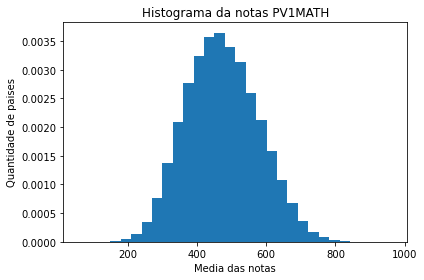

In [32]:
#Histograma das notas PV1MATH
fig, ax = plt.subplots()

ax.hist('PV1MATH', data=pisa, density=True, bins=30)
ax.set_title("Histograma da notas PV1MATH")
ax.set_ylabel("Quantidade de paises")
ax.set_xlabel("Media das notas")

plt.tight_layout()

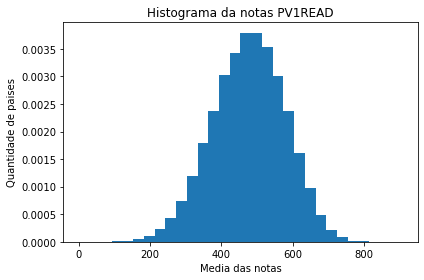

In [33]:
#Histograma das notas PV1READ
fig, ax = plt.subplots()

ax.hist('PV1READ', data=pisa, density=True, bins=30)
ax.set_title("Histograma da notas PV1READ")
ax.set_ylabel("Quantidade de paises")
ax.set_xlabel("Media das notas")

plt.tight_layout()

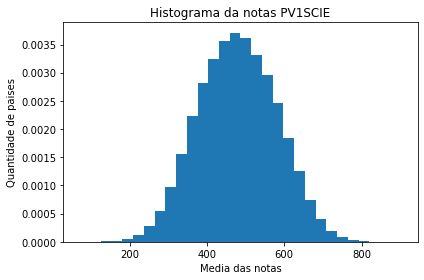

In [34]:
#Histograma das notas PV1SCIE
fig, ax = plt.subplots()

ax.hist('PV1SCIE', data=pisa, density=True, bins=30)
ax.set_title("Histograma da notas PV1SCIE")
ax.set_ylabel("Quantidade de paises")
ax.set_xlabel("Media das notas")

plt.tight_layout()

<AxesSubplot:>

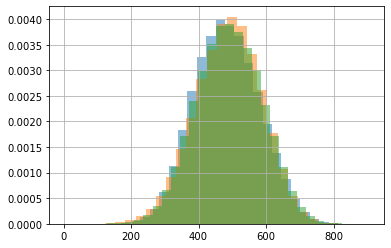

In [35]:
#histograma com todos os paises que fazem parte do OECD
pisa2 = pisa.copy()

pisaOECD = pisa[pisa['OECD']=='OECD']

pisaOECD.PV1MATH.hist(bins = 30, density = True, alpha= 0.5)
pisaOECD.PV1READ.hist(bins = 30, density = True, alpha= 0.5)
pisaOECD.PV1SCIE.hist(bins = 30, density = True, alpha= 0.5)

<AxesSubplot:>

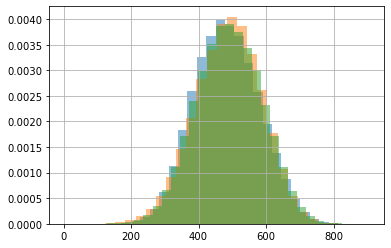

In [36]:
# histograma com todos os paises que não fazem parte do OECD
pisaNONOECD = pisa[pisa['OECD']=='NON-OECD']

pisaOECD.PV1MATH.hist(bins = 30, density = True, alpha=0.5)
pisaOECD.PV1READ.hist(bins = 30, density = True, alpha= 0.5)
pisaOECD.PV1SCIE.hist(bins = 30, density = True, alpha= 0.5)

In [37]:
pisa5 = pd.DataFrame(pisa[['CNT', 'ST04Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE']])
pisa5

,CNT,ST04Q01,PV1MATH,PV1READ,PV1SCIE
4743,United Arab Emirates,Male,328.2521,313.5423,397.2771
4744,United Arab Emirates,Male,270.7665,269.5957,301.5106
4745,United Arab Emirates,Male,314.9322,267.9116,293.7710
4746,United Arab Emirates,Male,250.2804,217.3890,329.2055
4747,United Arab Emirates,Male,310.1807,279.2190,378.1611
...,...,...,...,...,...
480439,United States,Male,311.8165,231.1825,275.7740
480440,United States,Male,311.8944,287.7196,307.3853
480441,United States,Male,296.0819,249.6272,268.3141
480442,United States,Male,296.9388,242.9711,274.6550


<AxesSubplot:>

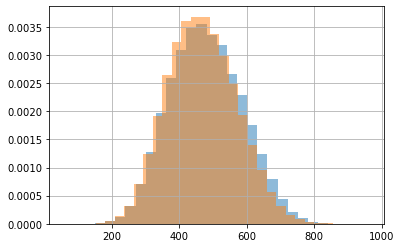

In [38]:
#Agora um histograma levando em consideração a media de matemática entre homens e mulheres
pisa6Male = pisa[pisa['ST04Q01']=='Male']
pisa6Female = pisa[pisa['ST04Q01']=='Female']

pisa6Male.PV1MATH.hist(bins = 30, density = True, alpha=0.5, label = 'Homem')
pisa6Female.PV1MATH.hist(bins = 30, density = True, alpha=0.5, label = 'Mulher')

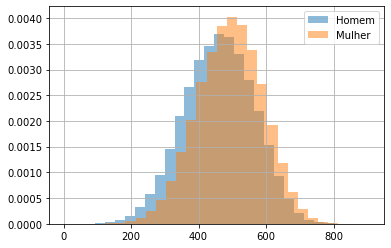

In [39]:
#Agora um histograma levando em consideração a media de Leitura entre homens e mulheres
pisa6Male.PV1READ.hist(bins = 30, density = True, alpha= 0.5, label = 'Homem')
pisa6Female.PV1READ.hist(bins = 30, density = True, alpha=0.5, label = 'Mulher')

plt.legend()

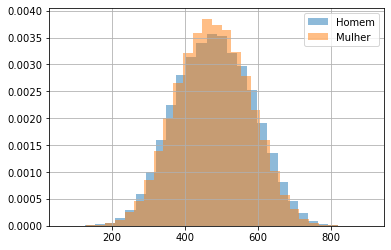

In [40]:
#Agora um histograma levando em consideração a media de Ciências entre homens e mulheres
pisa6Male.PV1SCIE.hist(bins = 30, density = True, alpha= 0.5, label = 'Homem')
pisa6Female.PV1SCIE.hist(bins = 30, density = True, alpha=0.5, label = 'Mulher')

plt.legend()

Verificando todas as 3 grandes areas de estudo (PV1MATH, PV1READ e PV1SCIE) as mulheres obtiveram as melhores médias. As menores e maiores diferenças por país são:
* Maiores = Bulgaria, Lithuania, France.
* Menores = China, Indonesia, Mexico.

In [41]:
pisa.groupby(['CNT', 'ST04Q01']).agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'}).head(60)

PV1MATH     PV1READ     PV1SCIE
CNT             ST04Q01                                    
Australia       Female   486.949163  518.283852  508.833434
                Male     498.473137  484.186143  513.559733
Brazil          Female   374.125981  414.378592  394.032508
                Male     391.938571  384.761934  396.774899
Bulgaria        Female   442.465094  476.277435  459.685495
                Male     441.865922  410.203548  442.547456
Canada          Female   505.068733  529.374147  513.943460
                Male     513.726671  492.512505  515.507221
Chile           Female   430.861337  470.116341  459.661955
                Male     458.659111  449.374545  469.730412
China           Female   567.075268  555.054238  549.942772
                Male     572.797039  525.772993  552.281922
Colombia        Female   372.632528  421.589186  398.693190
                Male     401.457091  406.616020  419.749832
Czech Republic  Female   513.662622  532.175570  526.297687
                Male     525.963536  493.601812  529.011426
Denmark         Female   479.150287  499.628015  476.815832
                Male     493.359271  467.888333  487.348264
Finland         Female   507.139756  539.887589  534.479945
                Male     507.904092  482.501952  521.599414
France          Female   494.341289  530.314409  503.572312
                Male     504.913565  486.862056  501.864943
Greece          Female   449.803422  502.286718  473.578390
                Male     458.020001  452.221726  460.991921
Hungary         Female   479.523334  513.638378  499.835905
                Male     491.896286  477.811839  505.058221
Indonesia       Female   374.414599  411.634250  385.281982
                Male     377.787781  383.188959  380.598162
Italy           Female   481.951575  514.916862  498.541250
                Male     501.487702  476.301049  501.499727
Japan           Female   525.367581  548.809028  540.016058
                Male     545.769012  527.730577  553.556475
Latvia          Female   496.140442  520.512969  512.500502
                Male     494.735214  469.741632  499.876820
Liechtenstein   Female   525.321564  532.233739  515.651064
                Male     549.098439  505.996668  534.350450
Lithuania       Female   478.795747  506.119076  504.072239
                Male     478.568659  449.903909  488.611987
Mexico          Female   412.066784  441.104773  416.543260
                Male     425.860701  416.207050  422.843735
Peru            Female   357.944823  393.849495  370.495413
                Male     378.356307  374.238208  377.471501
Portugal        Female   478.338774  504.488508  487.278591
                Male     490.746062  465.087358  485.592317
Russia          Female   483.636633  498.079828  487.323970
                Male     484.014070  459.059398  484.472495
Singapore       Female   571.038626  554.128161  547.920551
                Male     565.720983  520.868206  545.491945
Slovak Republic Female   480.733013  489.427185  473.030260
                Male     490.122890  449.242647  479.744350
South Korea     Female   544.938283  548.954007  536.473486
                Male     562.313674  524.843891  539.187998
Sweden          Female   479.807955  509.656965  488.688122
                Male     478.492366  461.323059  482.565925
Switzerland     Female   514.744382  515.746513  499.969055
                Male     526.525539  478.972126  506.219463
Taiwan          Female   555.010418  537.997923  521.938356
                Male     560.297182  504.889808  522.193211
Turkey          Female   441.790163  497.347383  467.623036
                Male     455.570095  454.725669  460.295703

In [42]:
pisa6 = pisa.copy()

In [43]:
def grau_instrucao_agregado_mae(grauMae):
    if grauMae == "She did not complete <ISCED level 1> ":
        valueM = 0
    elif grauMae == "<ISCED level 1> ":
        valueM = 1
    elif grauMae == "<ISCED level 2> ":
        valueM = 2
    elif grauMae == "<ISCED level 3B, 3C> ":
        valueM = 3
    else:
        valueM = 4
    return valueM

def grau_instrucao_agregado_pai(grauPai):
    if grauPai == "He did not complete <ISCED level 1> ":
        valueP = 0
    elif grauPai == "<ISCED level 1> ":
        valueP = 1
    elif grauPai == "<ISCED level 2> ":
        valueP = 2
    elif grauPai == "<ISCED level 3B, 3C> ":
        valueP = 3
    else:
        valueP = 4
    return valueP

In [44]:
pisa6['SomaPais'] = pisa.ST13Q01.apply(grau_instrucao_agregado_mae) + pisa.ST13Q01.apply(grau_instrucao_agregado_pai)
    
pisa6['SomaPais'].value_counts()

8    170829
4     67761
6     50206
2     25627
Name: SomaPais, dtype: int64

In [45]:
pisa6OECD = pisa6[pisa6['OECD']=='OECD']

In [46]:
Pais6OECD = list(pisa6OECD['CNT'].drop_duplicates())

In [47]:
pais_ig_OECD = pd.DataFrame(columns = ['CNT', 'igPais'])

### Lista de paises pertencentes ao OECD com os maiores graus de instruções

In [48]:
for i in Pais6OECD:
    pais_ig_OECD.loc[len(pais_ig_OECD)] = [i, pisa6OECD[pisa6OECD['CNT']==i].SomaPais.sum()]
pais_ig_OECD = pais_ig_OECD.drop_duplicates()
pais_ig_OECD.sort_values(by=['igPais'], ascending = False)

,CNT,igPais
11,Italy,196560
1,Canada,166856
14,Mexico,165852
0,Australia,97746
8,United Kingdom,86260
16,United States,77508
2,Switzerland,67772
6,Finland,60498
5,Denmark,49730
12,Japan,48650


In [49]:
pisa6NONOECD = pisa6[pisa6['OECD']=='Non-OECD']


In [50]:
Pais6NONOECD = list(pisa6NONOECD['CNT'].drop_duplicates())

In [51]:
pais_ig_NONOECD = pd.DataFrame(columns = ['CNT', 'igPais'])


### Lista de paises não pertencentes ao OECD com os maiores graus de instruções

In [52]:
for i in Pais6NONOECD:
    pais_ig_NONOECD.loc[len(pais_ig_NONOECD)] = [i, pisa6NONOECD[pisa6NONOECD['CNT']==i].SomaPais.sum()]
pais_ig_NONOECD = pais_ig_NONOECD.drop_duplicates()
pais_ig_NONOECD.sort_values(by=['igPais'], ascending = False)


,CNT,igPais
2,Brazil,103154
4,China,80724
0,United Arab Emirates,78152
3,Colombia,52670
10,Russia,47990
11,Singapore,38436
12,Taiwan,38418
9,Peru,35838
1,Bulgaria,35818
7,Lithuania,32286


In [53]:
pisa6['SomaPais'].value_counts()

8    170829
4     67761
6     50206
2     25627
Name: SomaPais, dtype: int64

In [54]:
pisa6.groupby(['SomaPais']).agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'})


,PV1MATH,PV1READ,PV1SCIE
SomaPais,,,
2,413.224760,423.480300,418.328274
4,434.234346,439.874228,439.864131
6,495.307268,493.528013,498.389484
8,491.627510,493.968672,497.835978


In [55]:
pisa7 = pisa6[pisa6.CNT.isin(list(pisa6['CNT'].drop_duplicates()))]
group_pais_dep = pd.crosstab(pisa6.CNT, pisa7.SomaPais)

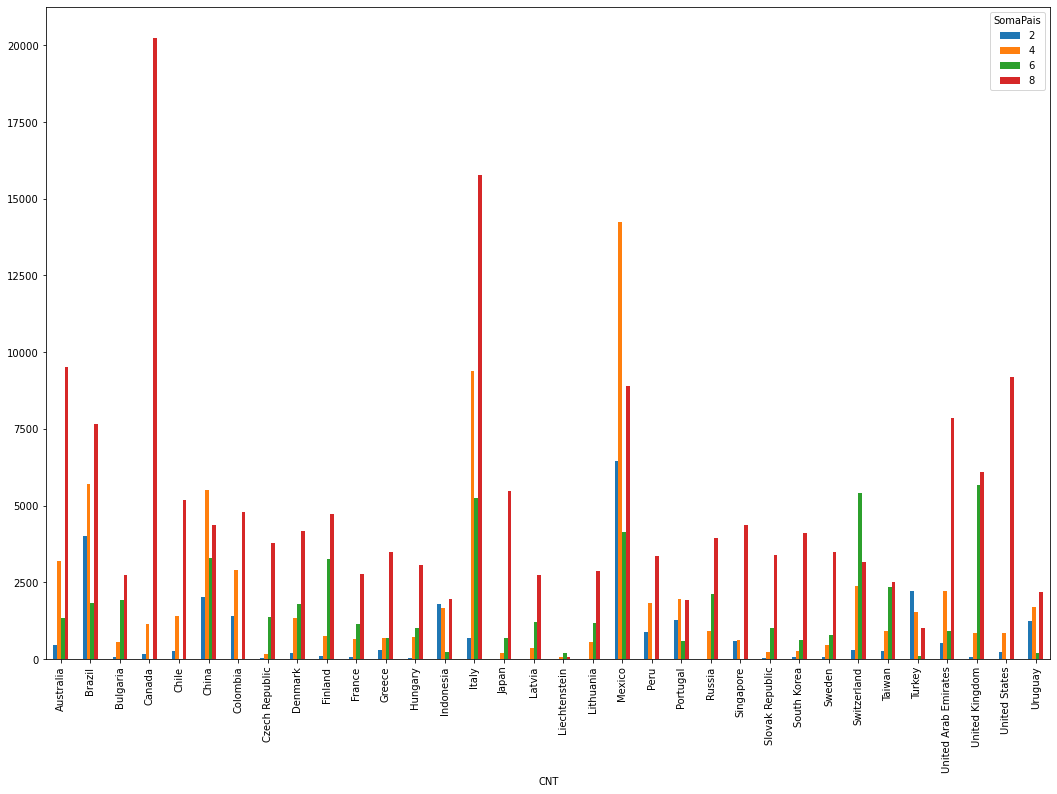

In [56]:
fig = group_pais_dep.plot.bar(figsize=(18,12))
fig.figure.show()

In [57]:
pisa8OECD = pisa[pisa['OECD'] == 'OECD']
pisa8NONOECD = pisa[pisa['OECD'] == 'Non-OECD']

In [58]:
pisa8 = pisa8OECD[pisa8OECD.CNT.isin(list(pisa8OECD['CNT'].drop_duplicates()))]
group_livros_OECD = pd.crosstab(pisa8.CNT, pisa8.ST28Q01)

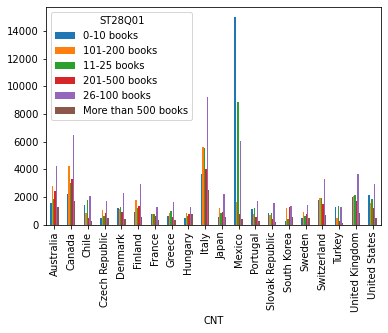

In [59]:
fig = group_livros_OECD.plot.bar()
fig.figure.show()

In [60]:
pisa82 = pisa8NONOECD[pisa8NONOECD.CNT.isin(list(pisa8NONOECD['CNT'].drop_duplicates()))]
group_livros_NonOECD = pd.crosstab(pisa82.CNT, pisa82.ST28Q01)

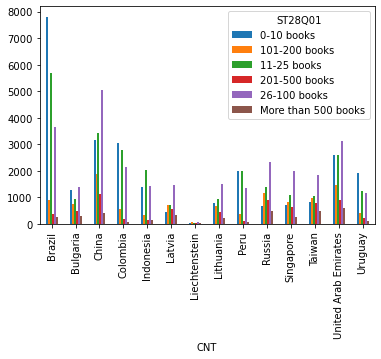

In [61]:
fig = group_livros_NonOECD.plot.bar()
fig.figure.show()

In [62]:
pisa83 = pisa8OECD[pisa8OECD.CNT.isin(list(pisa8OECD['CNT'].drop_duplicates()))]
group_pc_OECD = pd.crosstab(pisa83.CNT, pisa83.ST27Q03)

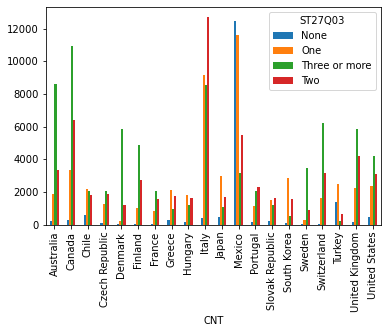

In [63]:
fig = group_pc_OECD.plot.bar()
fig.figure.show()

In [64]:
pisa84 = pisa8NONOECD[pisa8NONOECD.CNT.isin(list(pisa8NONOECD['CNT'].drop_duplicates()))]
group_pc_NonOECD = pd.crosstab(pisa84.CNT, pisa84.ST27Q03)

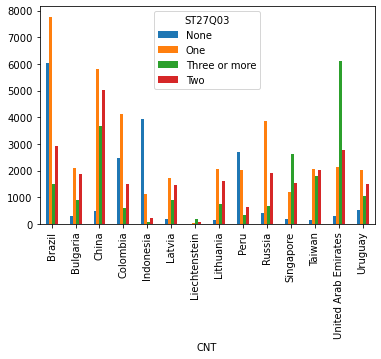

In [65]:
fig = group_pc_NonOECD.plot.bar()
fig.figure.show()

In [66]:
pisa.groupby('ST28Q01').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'})

,PV1MATH,PV1READ,PV1SCIE
ST28Q01,,,
0-10 books,413.353603,418.427756,418.198133
101-200 books,515.714763,518.092341,522.233055
11-25 books,441.457775,448.797808,447.921220
201-500 books,544.459681,544.193553,549.309377
26-100 books,488.107746,490.292003,493.366249
More than 500 books,538.638491,534.755037,543.737377


In [67]:
pisa = pisa[pisa.CNT.isin(list(pisa['CNT'].drop_duplicates()))]
group_livros_pais = pd.crosstab(pisa.CNT, pisa.ST28Q01)

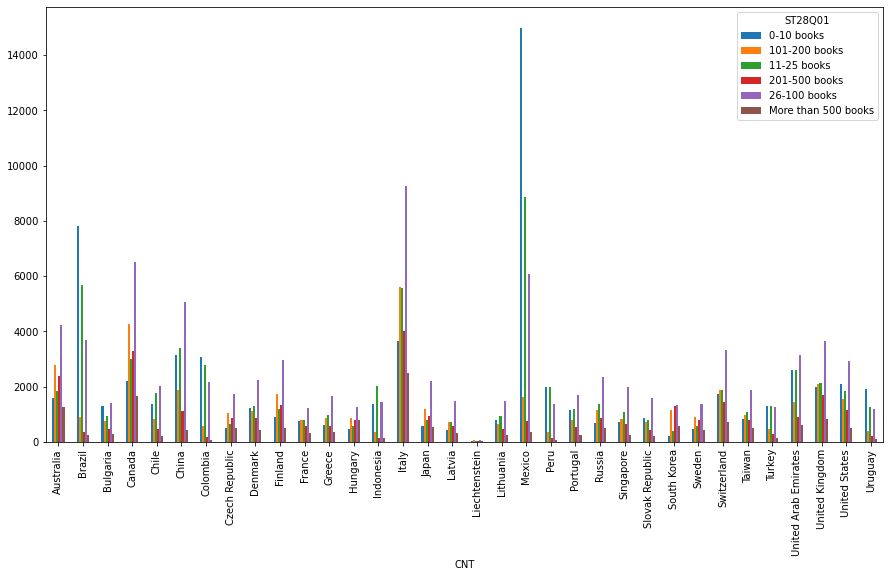

In [68]:
fig = group_livros_pais.plot.bar(figsize=(15,8))
fig.figure.show()

A relação clara que se pode obter e que as familias que tiveram acesso a mais livros ou tem mais livros em casa obtvieram uma media muito mais elevada do que os que não tiveram esta oportunidade

In [69]:
pisa10 = pisa[['ST28Q01', 'ST27Q03', 'PV1MATH']]

In [70]:
pd.pivot_table(pisa10, index = ['ST28Q01', 'ST27Q03'] ,
               values = 'PV1MATH',
               aggfunc = 'mean',
               margins=True )

PV1MATH
ST28Q01             ST27Q03                  
0-10 books          None           376.356286
                    One            417.959559
                    Three or more  446.311626
                    Two            435.550351
101-200 books       None           416.964038
                    One            504.153520
                    Three or more  528.327286
                    Two            517.555662
11-25 books         None           379.459373
                    One            440.037589
                    Three or more  472.027142
                    Two            461.076477
201-500 books       None           433.830219
                    One            532.721975
                    Three or more  554.034872
                    Two            542.914800
26-100 books        None           403.557732
                    One            480.019223
                    Three or more  506.885804
                    Two            495.157308
More than 500 books None           407.975081
                    One            521.302807
                    Three or more  551.128218
                    Two            539.946613
All                                476.386833

In [71]:
pisa11 = pisa.copy()

In [72]:
pisa11 = pisa11[(pisa11['IC05Q01']!=97)&(pisa11['IC05Q01']!=98)&(pisa11['IC05Q01']!=99)].drop_duplicates()

In [73]:
#pisa11['minutos_pc'] = pd.qcut(pisa11.IC05Q01, q=3,
       # labels = ['Sem uso', 'ate 30min.', 'Mais de 60min.'])

In [74]:
pd.set_option("display.max_rows", 200)

In [75]:
pisa11a = pd.pivot_table(pisa11, index = ['CNT', 'IC05Q01'], values = ['PV1MATH'])
pisa11a

PV1MATH
CNT             IC05Q01            
Australia       1        492.454090
                2        502.949589
                3        501.425337
                4        497.664596
                5        496.231531
                6        478.199082
                7        433.539379
Chile           1        446.482433
                2        455.339897
                3        443.404967
                4        422.002441
                5        435.312675
                6        439.926128
                7        422.303437
China           1        580.890320
                2        576.805943
                3        543.449048
                4        523.768471
                5        504.583406
                6        480.133949
                7        487.644457
Czech Republic  1        532.679146
                2        524.227556
                3        506.458749
                4        493.292638
                5        483.744735
                6        470.902931
                7        471.804256
Denmark         1        484.074006
                2        497.588312
                3        494.388011
                4        489.842770
                5        490.995424
                6        497.409032
                7        451.534505
Finland         1        529.628810
                2        523.147096
                3        496.590337
                4        457.363517
                5        452.802251
                6        444.809970
                7        432.506953
Greece          1        482.475568
                2        459.827095
                3        456.858185
                4        430.839816
                5        418.017875
                6        404.205830
                7        387.565622
Hungary         1        512.809028
                2        491.586228
                3        476.920357
                4        454.637846
                5        445.753996
                6        427.637004
                7        397.635039
Italy           1        506.686707
                2        498.201803
                3        482.842543
                4        458.178365
                5        451.653122
                6        432.342016
                7        412.608226
Japan           1        549.599374
                2        543.288757
                3        517.284806
                4        512.669329
                5        504.310393
                6        426.305687
                7        432.506700
Latvia          1        505.310132
                2        502.315664
                3        466.170334
                4        457.483169
                5        459.114630
                6        455.019672
                7        426.433978
Liechtenstein   1        552.825837
                2        543.710601
                3        519.233796
                4        531.000850
                5        497.402667
                6        494.633133
                7        488.012200
Mexico          1        422.466024
                2        424.775334
                3        429.600115
                4        411.360805
                5        413.058344
                6        409.092149
                7        387.070521
Portugal        1        506.342789
                2        495.465620
                3        465.470791
                4        448.720411
                5        453.138053
                6        425.163190
                7        394.590238
Russia          1        497.710598
                2        492.277956
                3        478.151649
                4        466.666240
                5        454.631392
                6        443.920118
                7        434.186622
Singapore       1        586.790001
                2        587.968177
                3        537.623074
                4        513.005821
                5        521.105

In [76]:
pisa12 = pisa.copy()

In [77]:
pisa12[['ST70Q01', 'ST70Q02', 'ST70Q03', 'PV1MATH', 'PV1READ', 'PV1SCIE']]

,ST70Q01,ST70Q02,ST70Q03,PV1MATH,PV1READ,PV1SCIE
4743,4.39898,4.502827,NaN,328.2521,313.5423,397.2771
4744,4.39898,4.502827,NaN,270.7665,269.5957,301.5106
4745,8.00000,8.000000,2.0,314.9322,267.9116,293.7710
4746,8.00000,4.502827,NaN,250.2804,217.3890,329.2055
4747,4.39898,4.502827,NaN,310.1807,279.2190,378.1611
...,...,...,...,...,...,...
480439,6.00000,6.000000,6.0,311.8165,231.1825,275.7740
480440,4.39898,4.502827,NaN,311.8944,287.7196,307.3853
480441,3.00000,3.000000,3.0,296.0819,249.6272,268.3141
480442,20.00000,10.000000,30.0,296.9388,242.9711,274.6550


In [78]:
pisa12['1_ST70Q01']= pd.qcut(pisa12.ST70Q01.drop_duplicates(), q=15)
pisa12['1_ST70Q02']= pd.qcut(pisa12.ST70Q02.drop_duplicates(), q=15)
pisa12['1_ST70Q03']= pd.qcut(pisa12.ST70Q03.drop_duplicates(), q=15)

In [79]:
pisa12.groupby('1_ST70Q01').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'}).sort_values(by='PV1MATH')

,PV1MATH,PV1READ,PV1SCIE
1_ST70Q01,,,
"(-0.001, 2.467]",274.791000,224.152100,295.325133
"(11.333, 13.8]",334.678300,300.702950,311.068600
"(6.4, 8.867]",349.633900,321.601800,382.357350
"(4.372, 6.4]",371.249400,370.186333,412.911833
"(28.133, 30.6]",380.129300,374.797350,373.545300
"(35.533, 40.0]",391.553700,410.209567,393.298533
"(19.467, 22.2]",426.320333,407.295733,389.257733
"(24.667, 28.133]",428.163800,430.258067,435.229400
"(8.867, 11.333]",429.773567,439.180333,437.032200


In [80]:
pisa12.groupby('1_ST70Q02').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'}).sort_values(by='PV1MATH')

,PV1MATH,PV1READ,PV1SCIE
1_ST70Q02,,,
"(-0.001, 2.0]",303.741533,273.71230,335.266667
"(23.0, 30.0]",351.113850,366.48325,344.824650
"(4.0, 5.0]",353.918050,334.79385,395.225650
"(32.0, 34.0]",381.804050,312.59650,315.404700
"(30.0, 32.0]",396.370150,315.46695,397.836650
"(7.0, 9.0]",414.636200,374.57030,403.804550
"(2.0, 4.0]",419.855100,353.71970,384.875050
"(5.0, 7.0]",429.163450,423.00775,497.239850
"(20.0, 23.0]",431.344450,399.39960,384.641900


In [81]:
pisa12.groupby('1_ST70Q03').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'}).sort_values(by='1_ST70Q03')

,PV1MATH,PV1READ,PV1SCIE
1_ST70Q03,,,
"(-0.001, 2.467]",309.739300,293.948067,322.678100
"(2.467, 4.933]",367.276850,321.160750,406.229050
"(4.933, 7.4]",425.437500,445.542400,460.624167
"(7.4, 9.867]",583.354100,583.375150,571.978750
"(9.867, 12.333]",493.101233,465.163367,493.509900
"(12.333, 14.8]",408.599500,525.678350,501.109650
"(14.8, 17.267]",576.265800,592.643033,603.792133
"(17.267, 19.733]",546.432450,550.918050,591.794100
"(19.733, 22.2]",429.254300,377.470333,408.156167


In [82]:
pisa13 = pisa.copy()

In [83]:
pisa13.ST57Q01.value_counts()

5.572087     117320
2.000000      35549
1.000000      29433
3.000000      23293
5.000000      17463
4.000000      16632
6.000000      11807
10.000000     11395
7.000000       8399
0.000000       7450
8.000000       7199
12.000000      4822
14.000000      3839
15.000000      3383
20.000000      2824
9.000000       2483
18.000000      1702
30.000000      1288
21.000000      1284
16.000000      1181
24.000000      1029
11.000000       841
25.000000       792
13.000000       776
28.000000       713
17.000000       428
22.000000       300
23.000000       224
19.000000       216
26.000000       168
27.000000       141
29.000000        49
Name: ST57Q01, dtype: int64

In [84]:
pisa13['tempo_estudo']= pd.qcut(pisa.ST57Q01.drop_duplicates(), q=12,
        labels = ['1h semanal','3h semanais','5h semanais','7h semanais',
                  '9h semanais','11h semanais','13h semanais','16h semanais','18h semanais',
                  '20h semanais','25h semanais','mais de 25h semanais'])

In [85]:
pisa13.groupby('tempo_estudo').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'})

,PV1MATH,PV1READ,PV1SCIE
tempo_estudo,,,
1h semanal,294.913533,280.983300,315.653367
3h semanais,412.974533,417.313933,459.660600
5h semanais,410.001600,448.269050,453.506150
7h semanais,537.734333,465.594500,549.179400
9h semanais,421.958250,356.125550,443.621750
11h semanais,464.514233,503.062167,456.365800
13h semanais,488.998800,570.848167,606.620633
16h semanais,463.748250,501.054800,544.237200
18h semanais,400.329733,470.505567,434.141500


#### O maior tempo medio de estudo semanal está na média de 5h e 30min.
#### A maior media de MATH fica em 7h semanais de estudo.
#### A maior media de READ fica em 13h semanais de estudo.
#### A maior media de SCIE fica em 13h semanais de estudo.

In [86]:
pisa14 = pisa.copy()

In [87]:
pisa14.ST03Q02.value_counts()

1996    288022
1997     26401
Name: ST03Q02, dtype: int64

In [88]:
def discretize_age(age):
    if age == 1996:
        return '16'
    else:
        return '15'

In [89]:
pisa14['Age'] = pisa14['ST03Q02'].apply(discretize_age)

In [90]:
pisa14.groupby('Age').agg({'PV1MATH': 'mean', 
                                   'PV1READ': 'mean',
                                   'PV1SCIE': 'mean'})

,PV1MATH,PV1READ,PV1SCIE
Age,,,
15,471.233443,480.653725,485.805244
16,473.659869,476.114151,478.322324


## Classificando Dados

In [91]:
pisa15 = pisa.copy()

In [92]:
#Criação da variavel TARGET.
media_math = pisa15['PV1MATH'].mean()
media_math

473.45613067526097

In [93]:
#com valor 1 para alunos com nota maior que a média global em Matemática; 0, em caso contrário.
def categoriza(s):
    if s < media_math:
        return 0
    else:
        return 1

In [94]:
#Variavel TARGERT.
pisa15['TARGET'] = pisa15['PV1MATH'].apply(categoriza)

In [95]:
pisa15a = pisa15.drop(columns=['PV1MATH', 'PV1READ', 'PV1SCIE'])

In [96]:
pisa15a.fillna(0, inplace = True)

In [97]:
pisa15a.select_dtypes(include='object')

,CNT,OECD,ST04Q01,ST07Q01,ST07Q02,ST08Q01,ST09Q01,ST13Q01,ST15Q01,ST17Q01,...,IC10Q05,IC10Q07,IC10Q08,IC11Q03,IC11Q05,IC22Q08,EC03Q01,EC03Q03,EC03Q04,EC03Q09
4743,United Arab Emirates,Non-OECD,Male,"No, never","No, never",One or two times,One or two times,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,...,0,0,0,0,0,0,0,0,0,0
4744,United Arab Emirates,Non-OECD,Male,"Yes, once","Yes, once",None,One or two times,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,...,0,0,0,0,0,0,0,0,0,0
4745,United Arab Emirates,Non-OECD,Male,"No, never","No, never",None,None,0,"Other (e.g. home duties, retired)",<ISCED level 2>,...,0,0,0,0,0,0,0,0,0,0
4746,United Arab Emirates,Non-OECD,Male,"Yes, once","No, never",None,None,<ISCED level 3A>,"Other (e.g. home duties, retired)",0,...,0,0,0,0,0,0,0,0,0,0
4747,United Arab Emirates,Non-OECD,Male,"No, never","No, never",None,None,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480439,United States,OECD,Male,"No, never","Yes, once",None,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480440,United States,OECD,Male,0,0,One or two times,Three or four times,<ISCED level 3A>,Working part-time <for pay>,<ISCED level 2>,...,0,0,0,0,0,0,0,0,0,0
480441,United States,OECD,Male,"Yes, once",0,Five or more times,One or two times,<ISCED level 3A>,"Not working, but looking for a job",0,...,0,0,0,0,0,0,0,0,0,0
480442,United States,OECD,Male,"Yes, once","No, never",Three or four times,Five or more times,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,...,0,0,0,0,0,0,0,0,0,0


In [98]:
#Transformando as colunas object em category.
for c in pisa15a.select_dtypes(include='object'):
    pisa15a[c] = pisa15a[c].astype('category').cat.codes

In [99]:
pisa15a.select_dtypes(include='float64')

,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06
4743,5.572087,1.61926,0.849429,0.827374,1.171911,1.555714,4.39898,4.502827,0.0,30.56854,0.0,2.000000,1.000000,1.000000,1.00000,2.000000,1.00000,1.000000
4744,5.572087,1.61926,0.849429,0.827374,1.171911,1.555714,4.39898,4.502827,0.0,30.56854,35.0,2.022545,2.848422,2.207167,1.87834,2.870835,1.95254,1.922335
4745,5.572087,1.61926,0.849429,0.827374,1.171911,1.555714,8.00000,8.000000,2.0,35.00000,36.0,2.022545,2.848422,2.207167,1.87834,2.870835,1.95254,1.922335
4746,5.572087,1.61926,0.849429,0.827374,1.171911,1.555714,8.00000,4.502827,0.0,7.00000,0.0,2.022545,2.848422,2.207167,1.87834,2.870835,1.95254,1.922335
4747,5.572087,1.61926,0.849429,0.827374,1.171911,1.555714,4.39898,4.502827,0.0,30.56854,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480439,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,6.00000,6.000000,6.0,30.56854,6.0,2.000000,1.000000,2.000000,1.00000,4.000000,2.00000,2.000000
480440,3.000000,3.00000,4.000000,2.000000,3.000000,5.000000,4.39898,4.502827,0.0,7.00000,0.0,2.022545,2.848422,2.207167,1.87834,2.870835,1.95254,1.922335
480441,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.00000,3.000000,3.0,30.56854,5.0,2.000000,2.000000,2.000000,2.00000,2.000000,1.00000,1.000000
480442,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,20.00000,10.000000,30.0,30.56854,10.0,2.022545,2.848422,2.207167,1.87834,2.870835,1.95254,1.922335


In [100]:
# normlizacao z-score
for c in pisa15a.select_dtypes(include='float64'):
    pisa15a[c] = (pisa15a[c] - pisa15a[c].mean()) / pisa15a[c].std()

In [101]:
#Variaveis numericas sem dados faltantes.
pisa15a.select_dtypes(include='int64').isnull().sum()

ST01Q01    0
ST03Q01    0
ST03Q02    0
IC05Q01    0
IC06Q01    0
IC07Q01    0
TARGET     0
dtype: int64

In [105]:
def drop_nan(df, target):
    ig = 0
    tipo = df.dtypes.to_dict()
    for c in tqdm(df.columns):
        if (c not in target) and (df[c].isnull().any()):
            if tipo[c] == 'int64':
                df[c] = df[c].fillna(df[c].mode().values[0])
            elif tipo[c] == 'float64':
                df[c] = df[c].fillna(df[c].mean())
            else:
                ig = ig + 1
    print('Out from %d columns, %d had the NaNs replaced'%(len(df.columns), len(df.columns)-ig))

In [106]:
pisa15a.corr()

,CNT,OECD,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST07Q01,ST07Q02,ST08Q01,ST09Q01,...,IC10Q07,IC10Q08,IC11Q03,IC11Q05,IC22Q08,EC03Q01,EC03Q03,EC03Q04,EC03Q09,TARGET
CNT,1.000000,0.064481,0.036363,1.118885e-03,0.151943,0.003568,0.001066,-0.049318,0.002228,0.030152,...,0.064534,0.062622,0.062176,0.061563,0.056855,-0.365897,-0.359657,-0.360146,-0.341083,0.009457
OECD,0.064481,1.000000,0.038065,-1.171518e-02,0.111937,0.008494,-0.082195,-0.113119,0.001325,0.033552,...,0.295948,0.274193,0.231204,0.234830,0.252246,0.233057,0.247633,0.270006,0.216728,0.121408
ST01Q01,0.036363,0.038065,1.000000,-2.670086e-02,0.017593,0.001646,0.011678,-0.010069,0.005334,0.004982,...,-0.028429,-0.023898,-0.017564,-0.016143,-0.029160,0.009511,0.023581,0.014985,0.014074,-0.012683
ST03Q01,0.001119,-0.011715,-0.026701,1.000000e+00,-0.312455,-0.000828,0.006118,-0.000808,-0.008585,-0.006044,...,-0.005352,-0.008236,-0.000755,-0.002248,-0.001061,-0.002335,-0.001543,0.000457,-0.004778,-0.012794
ST03Q02,0.151943,0.111937,0.017593,-3.124545e-01,1.000000,0.000764,-0.014499,-0.026061,-0.001251,-0.003021,...,-0.093507,-0.085556,-0.081291,-0.076162,-0.078489,-0.067604,-0.066494,-0.067515,-0.083089,0.001735
ST04Q01,0.003568,0.008494,0.001646,-8.282529e-04,0.000764,1.000000,0.003223,0.018449,-0.011227,-0.008462,...,-0.002301,-0.002207,0.039629,0.039410,0.021932,0.017827,0.015348,0.002917,-0.020094,0.049015
ST07Q01,0.001066,-0.082195,0.011678,6.118007e-03,-0.014499,0.003223,1.000000,-0.025013,0.080646,0.088798,...,-0.041730,-0.039577,-0.016477,-0.019807,-0.037581,0.011529,0.004139,0.004303,0.000905,-0.085858
ST07Q02,-0.049318,-0.113119,-0.010069,-8.075509e-04,-0.026061,0.018449,-0.025013,1.000000,0.074375,0.072861,...,-0.035702,-0.037733,-0.040124,-0.042051,-0.037456,0.078046,0.077622,0.078100,0.078389,0.000953
ST08Q01,0.002228,0.001325,0.005334,-8.584540e-03,-0.001251,-0.011227,0.080646,0.074375,1.000000,0.214234,...,0.022420,0.023288,0.024523,0.025739,0.013843,0.006024,0.008153,0.010585,-0.000745,-0.054969
ST09Q01,0.030152,0.033552,0.004982,-6.044008e-03,-0.003021,-0.008462,0.088798,0.072861,0.214234,1.000000,...,0.028565,0.023288,0.036230,0.036029,0.024059,0.058519,0.072949,0.064794,0.061204,-0.067578


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6

In [113]:
X = pisa15a[[c for c in pisa15a.columns if c != 'TARGET']]
y = pisa15a['TARGET']

In [114]:
#Pre-processamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
#Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify = y, test_size=0.3, random_state = 42)

In [116]:
#Criando um classificador
classificador = RandomForestClassifier(max_depth = 2, n_estimators = 100)

In [117]:
#Treinando o modelo usando os dados de treino
classificador.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [119]:
#predicao dos dados de treino
y_pred = classificador.predict(X_test)

#### A previsão do modelo ficou cerca de 72,89%

In [120]:
#calculando a acuracia do modelo
print("Acuracia:", accuracy_score(y_test, y_pred))

Acuracia: 0.6876186033691308


In [121]:
#Valores utilizados na variavel 
y.value_counts()

0    161798
1    152625
Name: TARGET, dtype: int64

In [122]:
print('Matriz de Confusao: ', confusion_matrix(y_test, y_pred))

Matriz de Confusao:  [[32865 15674]
 [13792 31996]]


In [125]:
pisa_feature_importances = pd.DataFrame( {"feature": list(X.columns), "importance": classificador.feature_importances_}).sort_values ("importance", ascending=False)

In [126]:
#Os recursos mais importantes
pisa_feature_importances_25 = pisa_feature_importances.head(15)
pisa_feature_importances_25

,feature,importance
16,ST26Q06,0.121350
17,ST27Q03,0.092099
15,ST26Q04,0.088933
101,EC03Q09,0.071624
20,ST28Q01,0.070388
99,EC03Q03,0.068193
98,EC03Q01,0.066143
18,ST27Q04,0.046499
100,EC03Q04,0.040612
10,ST13Q01,0.034073


In [127]:
print('Relatorio de feature_importance:', pisa_feature_importances.head(15))

Relatorio de feature_importance:      feature  importance
16   ST26Q06    0.121350
17   ST27Q03    0.092099
15   ST26Q04    0.088933
101  EC03Q09    0.071624
20   ST28Q01    0.070388
99   EC03Q03    0.068193
98   EC03Q01    0.066143
18   ST27Q04    0.046499
100  EC03Q04    0.040612
10   ST13Q01    0.034073
33   ST57Q02    0.033317
77   IC01Q04    0.029125
83   IC03Q01    0.027509
14   ST26Q01    0.020450
12   ST17Q01    0.020078


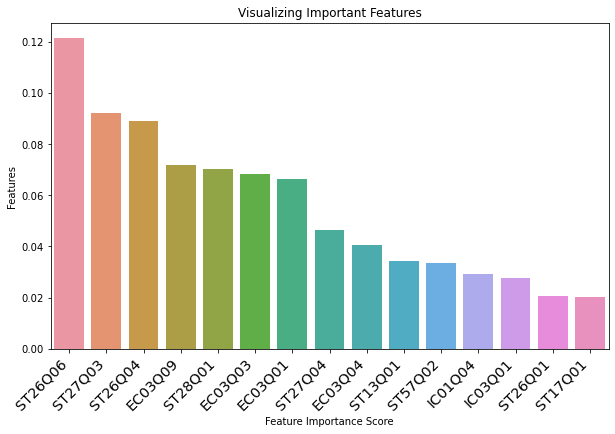

In [128]:
import seaborn as sns
sns.barplot(x=pisa_feature_importances_25.feature, y=pisa_feature_importances_25.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

plt.show()

In [129]:
pisa_desc['ST26Q06'], pisa_desc['ST28Q01'], pisa_desc['EC03Q09'], pisa_desc['EC03Q09'], pisa_desc['ST26Q06'], pisa_desc['EC03Q04'], pisa_desc['ST27Q03'], pisa_desc['EC03Q03'],pisa_desc['ST26Q04'], pisa_desc['IC01Q04'], pisa_desc['ST17Q01'], pisa_desc['ST13Q01'],pisa_desc['EC03Q01'], pisa_desc['ST57Q02'], pisa_desc['ST27Q04'], pisa_desc['IC03Q01'], pisa_desc['ST27Q05']

('Possessions - Internet',
 'How many books at home',
 'Future Orientation - web search - ISCED 3-5 (apos 9o ano)',
 'Future Orientation - web search - ISCED 3-5 (apos 9o ano)',
 'Possessions - Internet',
 'Future Orientation - Career advisor at school',
 'How many - computers',
 'Future Orientation - Job fair',
 'Possessions - computer',
 'At Home - Internet connection',
 'Father Highest Schooling',
 'Mother Highest Schooling',
 'Future Orientation - Internship',
 'Out-of-School Study Time - Guided Homework',
 'How many - cars',
 'First use of computers',
 'How many - rooms bath or shower')

### Criação dos Testes e Trainos para os Algoritmos de ML

In [130]:
#from sklearn.model_selection import train_teste_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report

X = pisa15a.drop("TARGET", axis = 1)
y = pisa15a["TARGET"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify = y, test_size=0.30, random_state = 42)

### Arvore de Decisão

In [131]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
target_tree = DecisionTreeClassifier(random_state=0)
target_tree = target_tree.fit(X_train, y_train)
print("Acuracia do modelo: ", target_tree.score(X_train, y_train))
Train_predict = target_tree.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test,Train_predict))
print(classification_report(y_test, Train_predict))

Acuracia do modelo:  0.9994275225356208
Acuracia da Previsão:  0.7038811793017906
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     48539
           1       0.69      0.70      0.70     45788

    accuracy                           0.70     94327
   macro avg       0.70      0.70      0.70     94327
weighted avg       0.70      0.70      0.70     94327



### Regressão Logistica

In [132]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
print("Acuracia do modelo: ", LR.score(X_train, y_train))
LR_predict = LR.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test, LR_predict))
print(classification_report(y_test, LR_predict))

Acuracia do modelo:  0.7716496437917999
Acuracia da Previsão:  0.7692177213311141
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     48539
           1       0.76      0.77      0.76     45788

    accuracy                           0.77     94327
   macro avg       0.77      0.77      0.77     94327
weighted avg       0.77      0.77      0.77     94327



### Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
print("Acuracia do modelo: ", NB.score(X_train, y_train))
NB_predict = NB.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test, NB_predict))
print(classification_report(y_test, NB_predict))

Acuracia do modelo:  0.6904259959290492
Acuracia da Previsão:  0.6878518345754662
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     48539
           1       0.65      0.76      0.70     45788

    accuracy                           0.69     94327
   macro avg       0.69      0.69      0.69     94327
weighted avg       0.69      0.69      0.69     94327



### Gradiente Descendente

In [134]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD = SGD.fit(X_train, y_train)
print("Acuracia do modelo: ", SGD.score(X_train, y_train))
SGD_predict = SGD.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test, SGD_predict))
print(classification_report(y_test, SGD_predict))

Acuracia do modelo:  0.7647799142192497
Acuracia da Previsão:  0.7620193581901258
              precision    recall  f1-score   support

           0       0.77      0.76      0.77     48539
           1       0.75      0.77      0.76     45788

    accuracy                           0.76     94327
   macro avg       0.76      0.76      0.76     94327
weighted avg       0.76      0.76      0.76     94327



### KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
print("Acuracia do modelo: ", knn.score(X_train, y_train))
knn_predict = knn.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test ,knn_predict))
print(classification_report(y_test, knn_predict))

Acuracia do modelo:  0.8113505015993021
Acuracia da Previsão:  0.7358020503143321
              precision    recall  f1-score   support

           0       0.82      0.62      0.71     48539
           1       0.68      0.86      0.76     45788

    accuracy                           0.74     94327
   macro avg       0.75      0.74      0.73     94327
weighted avg       0.75      0.74      0.73     94327



### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
print("Acuracia do modelo: ", RF.score(X_train, y_train))
RF_predict = RF.predict(X_test)
print("Acuracia da Previsão: ", accuracy_score(y_test, RF_predict))
print(classification_report(y_test, RF_predict))

Acuracia do modelo:  0.9994229790636813
Acuracia da Previsão:  0.8068421554804033
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     48539
           1       0.80      0.81      0.80     45788

    accuracy                           0.81     94327
   macro avg       0.81      0.81      0.81     94327
weighted avg       0.81      0.81      0.81     94327

